# Analyse des Einsatzes von Erschließungsstrategien beim Lesen

Am 9. 5. 2018 wurden an der Universität Salamanca in zwei DaF-Gruppen (A2, B1+) Daten zum wahrgenommenen Strategieneinsatz der Lernenden bei der Bearbeitung einer Aufgabe zum Lesen und Verstehen des neuen Wortschatzes erhoben.
Die Studierenden wurden gebeten, beim Lesen eines Textes aus dem Lehrwerk zunächst alle für sie neuen Wörter zu markieren (unabhängig von deren Verständnis). Nach einem zweiten Lesedurchgang sollten sie diese in eine Liste eintragen und angeben, welche Strategien sie angewendet hätten, um deren Bedeutung zu erkennen. 
Ein Teil der Lernenden hatte zuvor (freiwillig) an der Befragung zum Thema Erschließungsstrategien für unbekannten Wortschatz im Deutschen durch Lernende an spanischen Universitäten teilgenommen (siehe: http://diarium.usal.es/martinakienberger/200-2/?lang=de). Für alle Studierenden wurde kurz das Thema erklärt und Beispiele für Strategien gegeben. 

### Vorbereitung - Datenreinigung

In [2]:
import pandas as pd
import numpy as np
from biofes import biplot
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
from adjustText import adjust_text
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
Rohdaten = pd.read_excel('D:\Daten\DISS\Daten\Salamanca.xlsx')

In [4]:
Rohdaten.head(3)

,Grupo,ID_alumno,Encuesta,Palabra,Estrategia_1,Estrategia_2,Estrategia_Esp_1,Estrategia_Esp_2,Comentario
0,A2.1,1,1,wärmsten,Dicc,NaN,NaN,NaN,NaN
1,A2.1,1,1,Chefsekretärin,Dicc,Con,Trad,NaN,NaN
2,A2.1,1,1,Speditionsunternehmen,Dicc,Con,Trad,NaN,NaN


In [5]:
Daten = Rohdaten

In den beiden Gruppen aus Salamanca mussten keine Teilnehmer von der Analyse ausgeschlossen werden.

#### Auswahl der für die Analyse relevanten Teile der Erhebung

In [6]:
cols = ['Grupo','ID_alumno','Encuesta','Palabra','Estrategia_1','Estrategia_2']

In [7]:
data = Daten[cols]

In [8]:
data.loc[2]

Grupo                            A2.1
ID_alumno                           1
Encuesta                            1
Palabra         Speditionsunternehmen
Estrategia_1                     Dicc
Estrategia_2                      Con
Name: 2, dtype: object

(Weitere in der Excel-Tabelle erfasste Informationen dienten einerseits zur Entscheidung für Aufnahme in oder Ausschluss aus der Analyse und können andererseits für spätere, detaillierte Analysen herangezogen werden.)

## Analyse des Strategieneinsatzes

##### Unterteilung der beiden Gruppen

In [9]:
A2 = data[data.Grupo == 'A2.1']

In [10]:
B1 = data[data.Grupo == 'B1.2']

### Gruppe A2

In [11]:
print(r'Teilnehmer: ' + str(len(A2.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(A2[A2.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(A2[A2.Encuesta == 2].ID_alumno.unique()))+'\n'+
      r'TN ? Online-Befragung: ' + str(len(A2[A2.Encuesta == 0].ID_alumno.unique())))

Teilnehmer: 23
TN + Online-Befragung: 4
TN - Online-Befragung: 13
TN ? Online-Befragung: 6


Die Gruppe besteht aus 23 Teilnehmern. 4 hatten an der Online-Befragung teilgenommen, 13 nicht, 6 hatten keine Angabe dazu gemacht.

#### Als "neu" identifizierte Wörter (A2)

In [12]:
len(A2.Palabra.unique())

68

68 unterschiedliche Wörter wurden von den Lernenden als für sie "neu" angegeben. Bei der Datenübertragung von den Aufgabenblättern in Excel wurden orthographische Fehler berichtigt. Die Wörter wurden in der jeweiligen Schreibung des Originaltextes aus dem Lehrbuch übernommen (auch wenn die Lernenden teilweise stattdessen eine andere Form, z.B. Infinitiv, angegeben hatten).

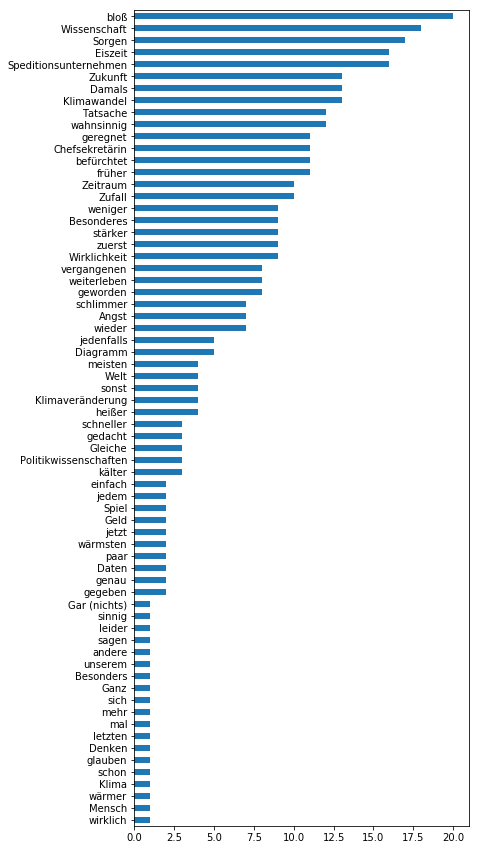

In [13]:
#A2.Palabra.value_counts().plot(kind = 'bar', figsize = (15,5))
A2.Palabra.value_counts(ascending = True).plot(kind = 'barh', figsize = (6,15));

#### Kreuztabelle Studenten - neue Wörter (A2)

In [14]:
Al_Pal_A2 = pd.crosstab(A2.ID_alumno, A2.Palabra, margins = True)

In [15]:
Al_Pal_A2.T.head()

ID_alumno,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,All
Palabra,,,,,,,,,,,,,,,,,,,,,
Angst,0,1,1,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,0,7
Besonderes,0,1,0,0,1,1,0,0,0,0,...,1,1,1,0,1,1,0,0,0,9
Besonders,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Chefsekretärin,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,11
Damals,1,1,1,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,13


##### Histogramm

In [16]:
A2.ID_alumno.value_counts().sort_index()

1     20
2     19
3     18
4     17
5     20
6     18
7     13
8     16
9     21
10    12
11    11
12    15
13    20
14    13
15    14
16    13
17    21
18    10
19    21
20    45
21    10
22    10
23    11
Name: ID_alumno, dtype: int64

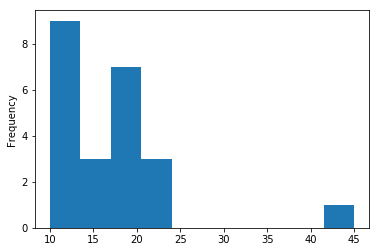

In [17]:
A2.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

Das Histogramm zeigt die Frequenz der Wortanzahl pro TN - keine Normalverteilung in diesem Fall.

Ein Student stellt mit 45 als neu identifizierten Wörtern eine Ausnahme dar (Ausreißer).

In [18]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 10
Maximum der als "neu" identifizierten Wörter: 45


In [19]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A2['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 16.869565217391305


In [20]:
A2_1 = A2[A2.ID_alumno != 20].reset_index(drop = True)

In [21]:
Al_Pal_A2_1 = pd.crosstab(A2_1.ID_alumno, A2_1.Palabra, margins = True)

In [22]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A2_1['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 15.590909090909092


Durchschnittlich wurden ca. 15,5 Wörter als "neu" identifiziert (17 unter Berücksichtigung von ID 20). Große Schwankungsbreite: zwischen 10 und 45 (siehe oben).

#### Einsatz von Erschließungsstrategien (A2)

Die freien Angaben der Lernenden zu den ihrer Ansicht nach eingesetzten Strategien wurden den Hauptkategorien aus der Online-Befragung zu Erschließungsstrategien unter DaF-Lernenden an spanischen Universitäten (siehe http://diarium.usal.es/martinakienberger/200-2/?lang=de) zugeordnet und entsprechend in Excel erfasst:

* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

Großteils konnte eine eindeutige Zuordnung vorgenommen werden. In Einzelfällen war es schwierig, zwischen "Lehrer/in um Hilfe bitten" und "andere Kursteilnehmer/innen um Hilfe bitten" zu unterscheiden (Angabe z.B. "me lo explicaron").

Manchmal gaben die Lernenden auch zwei Strategien für die Erschließung eines Wortes an. Wenn diese zwei unterschiedlichen Hauptstrategien zugeordnet werden konnten, wurden in diesen Fällen zwei Strategien erfasst. 

Beispiele:

"deducción por el contexto y porque es una palabra compuesta" ("Erschließung durch den Kontext und weil es ein zusammengesetzes Wort ist") -> Kontext + Wissen über das Deutsche (2 Strategien: Con, AL)

"Palabra parecida al español "angustia" o inglés "anxiety" ("Wort ähnlich dem spanischen "angustia" oder dem englischen "anxiety") -> Hilfe durch die Erstsprache + andere Sprachen (2 Strategien: L1, LE)

In [23]:
v1 = A2.Estrategia_1.value_counts()
v2 = A2.Estrategia_2.value_counts()

In [24]:
v = v1 + v2
v['Co'] = v1['Co']
v

AL       81.0
Co       14.0
Con      85.0
Dicc    163.0
L1       15.0
LE       11.0
Prof      8.0
dtype: float64

In [25]:
v.sort_values(ascending = False)

Dicc    163.0
Con      85.0
AL       81.0
L1       15.0
Co       14.0
LE       11.0
Prof      8.0
dtype: float64

Da die Angaben einiger Studierender zwei Strategien zugeordnet werden können, müssen die Nennungen für die Gesamtauswertung zusammengezählt werden.

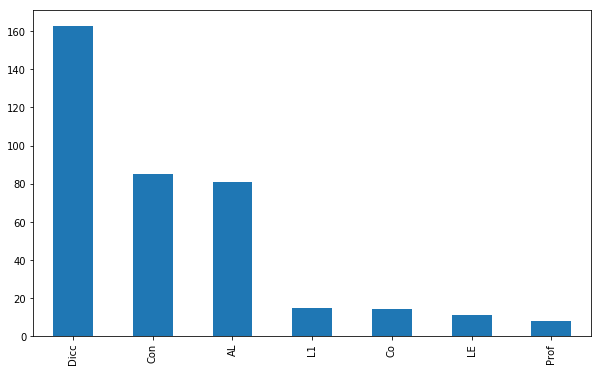

In [26]:
v.sort_values(ascending = False).plot(kind = 'bar', 
                                      #title = 'Angaben zu eingesetzten Strategien',
                                     figsize = (10,6));

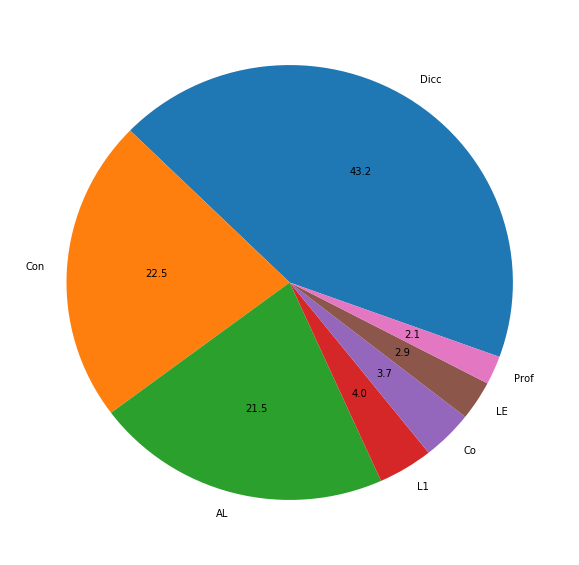

In [27]:
ax = v.sort_values(ascending = False).plot(kind = 'pie', 
                                           #title = 'Angaben zu eingesetzten Strategien', 
                                           figsize = (10,10),
                                           autopct='%.1f', startangle = -20);

ax.set_ylabel("");

Die beiden Diagramme zeigen, mit welcher Häufigkeit die unterschiedlichen Arten von Strategien in der Gesamtgruppe eingesetzt wurden.

In der Folge wird untersucht, wie sich das strategische Verhalten der einzelnen Lernenden unterscheidet. Für die Analyse wird mit einer Kreuztabelle und Biplot gearbeitet. Zuletzt wird versucht, durch eine Cluster-Analyse Gruppen von Individuen mit ähnlichem Strategieneinsatz zu bilden.

#### Kreuztabelle Studenten - verwendete Strategien (A2)

In [28]:
CTA2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_1, margins = True)

CTA2_2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_2, margins = True)

In [29]:
for val in CTA2_2.index:
    for col in CTA2_2.columns:
        if CTA2_2.loc[val,col]!=0:
            CTA2.loc[val,col] = CTA2.loc[val,col]+ CTA2_2.loc[val,col]

In [30]:
CTA2

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
1,1,0,3,19,0,0,0,23
2,4,3,5,5,0,2,0,19
3,5,0,7,6,0,1,0,19
4,4,0,10,3,4,0,1,22
5,0,3,4,4,0,1,0,12
6,7,0,1,0,3,1,0,12
7,1,0,7,4,0,2,0,14
8,0,0,0,15,1,0,0,16
9,11,0,2,7,2,1,0,23


#### Korrespondenzanalyse und Biplot Studenten - verwendete Strategien (A2)

In [31]:
CA_A2L = biplot.CA(CTA2.values[:-1,:-1], 7, method = 1)

Mit den Daten der Kreuztabelle kann eine Korrespondenzanalyse durchgeführt werden, um die Beziehungen zwischen Elementen und Variablen grafisch repräsentieren zu können.

Eine Alternative stellt der Biplot dar, der besser geeignet ist, um Dimensionen der Darstellung zu reduzieren.

In [32]:
Biplot_A2L = biplot.Classic(CTA2.values[:-1,:-1], 7, method = 1)

In [33]:
R = Biplot_A2L.RowCoord
C = Biplot_A2L.ColCoord
cr = Biplot_A2L.RowCont
cc = Biplot_A2L.ColCont

##### Qualität der Repräsentation der Elemente und Variablen auf den Achsen des Biplots

In [34]:
Biplot_A2L.Inert

array([ 33.27824989,  20.24002969,  15.87240084,  11.92577704,
        10.60213139,   5.14115245,   2.94025869])

Überblick über Informationsgehalt der einzelnen Achsen des Biplot (hier 7)

In [35]:
pd.DataFrame(cr, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTA2.index[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
ID_alumno,,,,,,,
1,55.638531,0.473680,0.495541,15.785207,2.132420,16.311996,9.162625
2,0.010853,43.028987,11.243279,38.951244,1.579011,5.085270,0.101356
3,11.324768,5.233696,46.571126,0.001691,14.831519,6.079107,15.958094
4,22.192201,2.013733,20.836525,9.456401,45.446324,0.015518,0.039299
5,21.802663,13.856321,13.948733,21.197826,1.040282,0.441437,27.712738
6,57.367353,8.292671,19.708382,0.210345,6.081801,5.050026,3.289423
7,2.673535,5.811889,54.584211,19.930192,10.319927,5.410864,1.269383
8,25.522713,0.724673,21.649195,5.462764,0.063882,45.079671,1.497102
9,46.072373,17.150077,25.016669,0.301873,1.043666,1.355161,9.060181


In [36]:
pd.DataFrame(cc, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTA2.columns[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
Estrategia_1,,,,,,,
AL,56.360089,8.377718,17.630973,1.578724,0.050138,12.348604,3.653755
Co,42.733997,30.379229,0.013709,4.898264,9.294330,9.519659,3.160812
Con,3.530487,0.000208,86.321652,4.483758,1.599102,3.117067,0.947726
Dicc,70.320551,8.954528,1.175884,3.412116,4.482218,2.076432,9.578269
L1,44.188307,4.281261,0.543233,2.951205,42.547468,4.813577,0.674948
LE,15.551747,30.335112,4.912537,44.177283,1.237640,2.638893,1.146788
Prof,0.262572,59.352150,0.508817,21.979089,15.004023,1.473835,1.419514


Interpretation:

Um beispielsweise eine gute Repräsentation von Strategie "AL" zu bekommen, müssen für eine Darstellung in 2 Dimensionen Achse 1 und 3 gewählt werden. Für "L1" wären Achse 1 und 5 geeignet, für "Con" hauptsächlich Achse 3. (Für die Programmierung in Python ist zu beachten, dass "1" dem Wert "0" entspricht usw.)

#### Cluster-Analyse Studenten - verwendete Strategien (A2)

Mit den Werten der Kreuztabelle können auch Cluster berechnet werden, um Gruppen differenzieren zu können.

Diese können in der Folge in einer Grafik mit den Ergebnissen des Biplots dargestellt werden.

In [37]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(CTA2.values[:-1,:-1])
#ward = AgglomerativeClustering(n_clusters=5).fit(CTA2.values[:-1,:-1])

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

Tests mit unterschiedlicher Anzahl an Clustern zeigen, dass 5 bzw. 7 Gruppen unterschieden werden können, wobei 2 Elemente für sich stehen und keine bzw. eine eigene Gruppe bilden.

##### Darstellung Biplot + Cluster

In [38]:
def vector_to_shape(v):
    markers = ["," , "o" , "v" , "^", "x", "D", "*"]
    return [markers[el] for el in v]

In [39]:
def vector_to_color(v):
    col = ['b', 'g', 'r', 'c', 'm', 'k', 'y']
    return [col[el] for el in v]

In [40]:
def graf_cplot(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)

    sh_v = vector_to_shape(ward.labels_)
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20, c = color_v[i] ,marker = sh_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))]
    adjust_text(texts);

In [41]:
def graf_cplot1(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.CA(data, dim, method = 1) 
    R = B.RowCoordinates
    C = B.ColCoordinates
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)

    sh_v = vector_to_shape(ward.labels_)
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20, c = color_v[i] ,marker = sh_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))]
    adjust_text(texts);

Die bevorzugte Form der Visualisierung wird als Funktion definiert (vgl. "Datenanalyse_Voc_Valencia") und in der Folge für alle weiteren Biplot/Cluster-Darstellungen verwendet. (Die Funktion beinhaltet bereits die Berechnung des Biplots bzw. der Korrespondenzanalyse sowie der Cluster.)

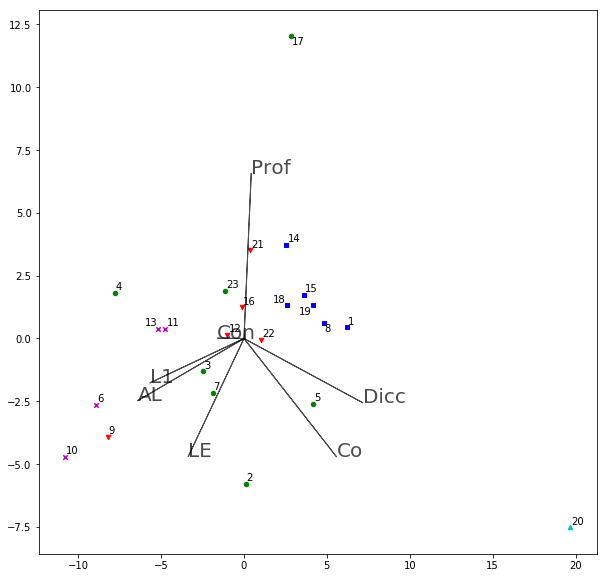

In [42]:
graf_cplot(CTA2.iloc[:-1,:-1], 7, 5)

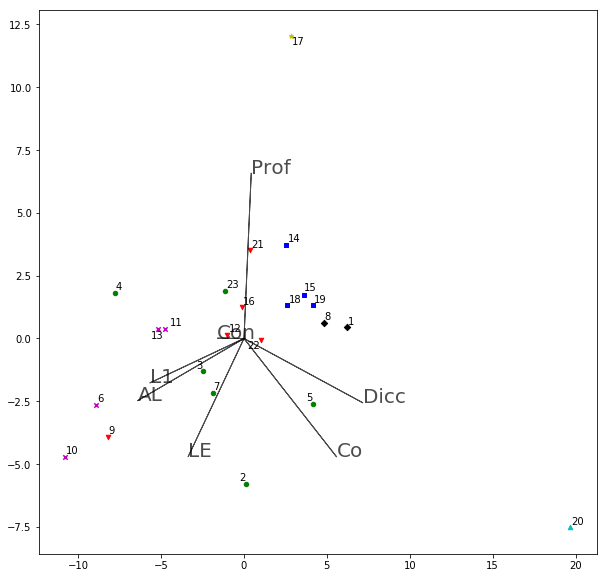

In [43]:
graf_cplot(CTA2.iloc[:-1,:-1], 7, 7)

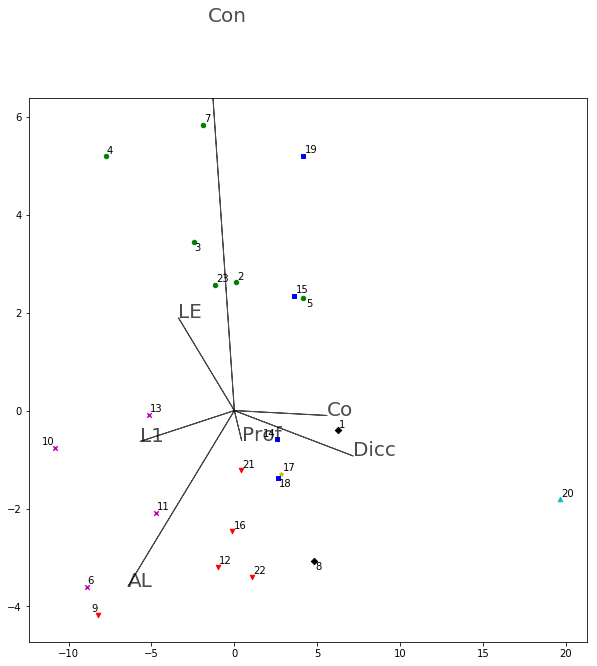

In [44]:
graf_cplot(CTA2.iloc[:-1,:-1], 7, 7, 0, 2)

#### Kreuztabelle Wörter - verwendete Strategien (A2)

In [45]:
Pal_Es_A2 = pd.crosstab(A2.Palabra, A2.Estrategia_1, margins = True)
Pal_Es_A2_2 = pd.crosstab(A2.Palabra, A2.Estrategia_2, margins = True)

In [46]:
for val in Pal_Es_A2_2.index:
    for col in Pal_Es_A2_2.columns:
        if Pal_Es_A2_2.loc[val,col]!=0:
            Pal_Es_A2.loc[val,col] = Pal_Es_A2.loc[val,col]+ Pal_Es_A2_2.loc[val,col]

In [47]:
Pal_Es_A2.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,81,14,85,163,15,11,8,377
Speditionsunternehmen,8,0,5,5,2,1,0,21
Eiszeit,10,0,2,6,0,1,0,19
Wissenschaft,8,0,2,9,0,0,0,19
Sorgen,1,1,2,10,0,0,2,16
bloß,0,0,4,10,0,0,2,16
Klimawandel,1,0,8,2,3,0,0,14
Zeitraum,5,0,5,3,0,0,0,13
Zukunft,0,0,2,9,1,0,1,13


In dieser Kreuztabelle werden als neu identifizierte Wörter mit den angegebenen Strategien in absteigender Frequenz dargestellt.

#### Korrespondenzanalyse und Biplot Wörter - verwendete Strategien (A2)

In [48]:
#Biplot_A2W = biplot.Classic(Pal_Es_A2.values[:-1,:-1], 7, method = 1)

In [49]:
#R = Biplot_A2W.RowCoord
#C = Biplot_A2W.ColCoord
#cr = Biplot_A2W.RowCont
#cc = Biplot_A2W.ColCont

#### Cluster

In [50]:
#kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#ward = AgglomerativeClustering(n_clusters=4).fit(Pal_Es_A2.values[:-1,:-1])

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

##### Darstellung Biplot + Cluster

In [51]:
def graf_cplot2(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)
    
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,0],C[i,1])
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)
        
    ax.scatter(R[:,dim1],R[:,dim2], s = 0.5, c = color_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center', color=color_v[i]) for i in range(len(R[:,0]))]
    adjust_text(texts);

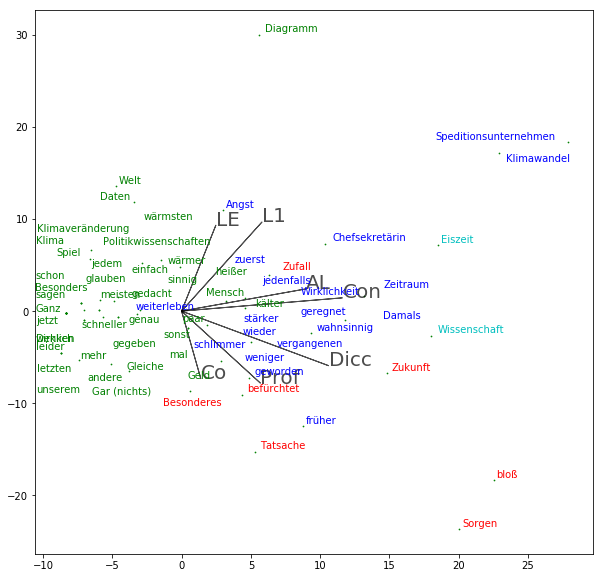

In [52]:
graf_cplot2(Pal_Es_A2.iloc[:-1,:-1],7, 4)

Die Gruppierung der als "neu" identifizierten Wörtern in Hinblick auf die zu ihrer Erschließung eingesetzten Strategien zeigt, dass bestimmte Wörter (vermutlich abhängig von Wortart, Ko- und Kontext) den Einsatz bestimmter Strategien nahe legen.

### Gruppe B1+

In [53]:
print(r'Teilnehmer: ' + str(len(B1.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(B1[B1.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(B1[B1.Encuesta == 2].ID_alumno.unique()))+'\n'+
      r'TN ? Online-Befragung: ' + str(len(B1[B1.Encuesta == 0].ID_alumno.unique())))

Teilnehmer: 13
TN + Online-Befragung: 13
TN - Online-Befragung: 0
TN ? Online-Befragung: 0


Im Fall der Gruppe B1+ haben alle Lernenden auch an der Online-Befragung teilgenommen, da diese in der Unterrichtszeit durchgeführt wurde. 

#### Als "neu" identifizierte Wörter

In [54]:
len(B1.Palabra.unique())

29

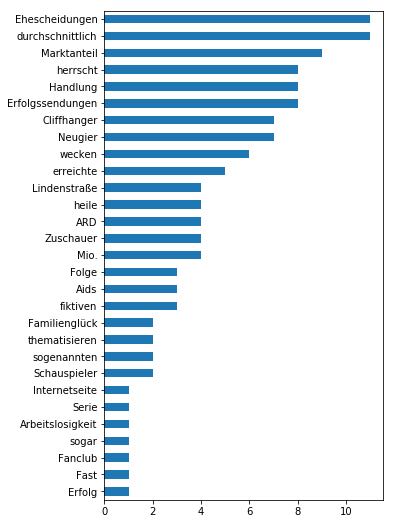

In [55]:
B1.Palabra.value_counts(ascending = True).plot(kind = 'barh', figsize = (5,9));

#### Kreuztabelle Studenten - neue Wörter (B1+)

In [56]:
Al_Pal_B1 = pd.crosstab(B1.ID_alumno, B1.Palabra, margins = True)

In [57]:
Al_Pal_B1.T.head()

ID_alumno,24,25,26,27,28,29,30,31,32,33,34,35,36,All
Palabra,,,,,,,,,,,,,,
ARD,0,0,1,1,0,0,1,0,0,0,0,1,0,4
Aids,0,0,0,0,0,0,0,0,0,1,0,1,1,3
Arbeitslosigkeit,0,0,0,0,0,1,0,0,0,0,0,0,0,1
Cliffhanger,0,0,1,1,1,0,1,1,1,0,0,1,0,7
Ehescheidungen,1,1,1,1,0,1,1,1,1,0,1,1,1,11


In [58]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_B1['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 9.538461538461538


In [59]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(B1.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(B1.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 6
Maximum der als "neu" identifizierten Wörter: 22


In [60]:
B1_1 = B1[B1.ID_alumno != 35].reset_index(drop = True)

In [61]:
Al_Pal_B1_1 = pd.crosstab(B1_1.ID_alumno, B1_1.Palabra, margins = True)

In [62]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_B1_1['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 8.5


Durchschnittlich wurden ca. 9,5 Wörter pro Person als "neu" identifiziert, 8,5 ohne ID 35 (Ausreißer). Schwankungsbreite: zwischen 6 und 22.

In [63]:
B1.ID_alumno.value_counts().sort_index()

24     8
25    10
26     8
27     7
28     7
29     9
30    10
31     6
32     7
33    10
34     9
35    22
36    11
Name: ID_alumno, dtype: int64

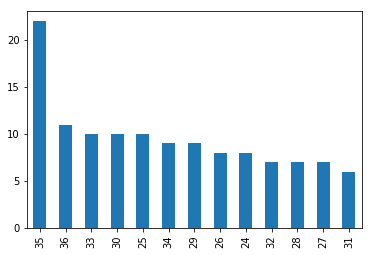

In [64]:
B1.ID_alumno.value_counts().plot(kind = 'bar');

##### Histogramm

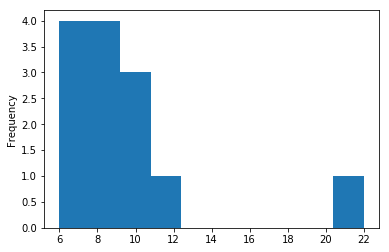

In [65]:
B1.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

#### Einsatz von Erschließungsstrategien (B1+)

Kategorien von Strategien (vgl. Bemerkungen zu Gruppe A2):
* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

In [66]:
B1.Estrategia_1.value_counts()

Dicc    57
AL      42
Con     10
LE       9
Co       3
L1       2
Prof     1
Name: Estrategia_1, dtype: int64

In [67]:
B1.Estrategia_2.value_counts()

Dicc    17
AL       4
Con      4
Prof     1
Name: Estrategia_2, dtype: int64

In [68]:
w1 = B1.Estrategia_1.value_counts()
w2 = B1.Estrategia_2.value_counts()
w = w1 + w2
w['LE'] = w1['LE']
w['L1'] = w1['L1']
w['Co'] = w1['Co']

In [69]:
w.sort_values(ascending = False)

Dicc    74.0
AL      46.0
Con     14.0
LE       9.0
Co       3.0
Prof     2.0
L1       2.0
dtype: float64

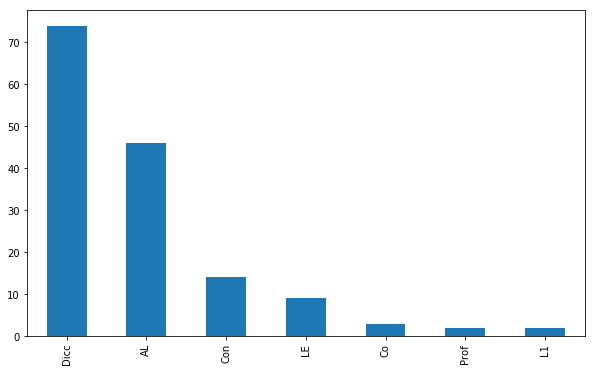

In [70]:
w.sort_values(ascending = False).plot(kind = 'bar', 
                                      #title = 'Angaben zu eingesetzten Strategien',
                                     figsize = (10,6));

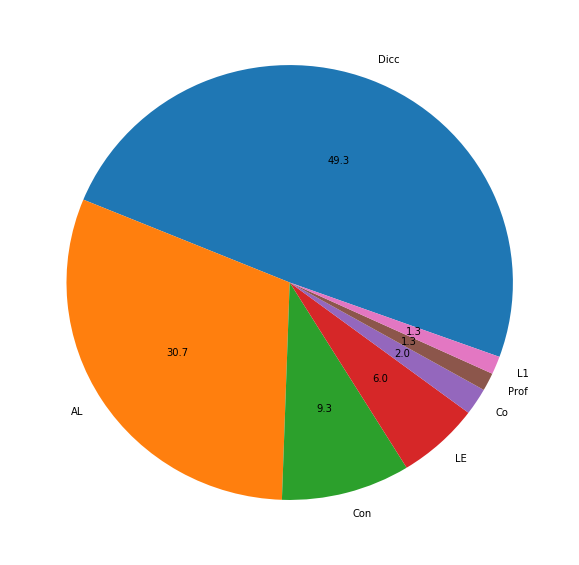

In [71]:
ax1 = w.sort_values(ascending = False).plot(kind = 'pie',
                                           #title = 'Angaben zu eingesetzten Strategien',
                                           figsize = (10,10),
                                           autopct='%.1f', startangle = -20)

ax1.set_ylabel("");

#### Kreuztabelle Studenten - verwendete Strategien (B1+)

In [72]:
CTB1 = pd.crosstab(B1.ID_alumno, B1.Estrategia_1, margins = True)
CTB1_2 = pd.crosstab(B1.ID_alumno, B1.Estrategia_2, margins = True)

In [73]:
for val in CTB1_2.index:
    for col in CTB1_2.columns:
        if CTB1_2.loc[val,col]!=0:
            CTB1.loc[val,col] = CTB1.loc[val,col]+ CTB1_2.loc[val,col]

In [74]:
CTB1

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
24,2,0,1,8,0,0,0,11
25,3,0,0,7,0,0,0,10
26,2,0,1,5,0,1,0,9
27,1,0,1,5,0,0,0,7
28,3,0,1,7,0,0,0,11
29,5,1,1,3,0,0,0,10
30,3,1,1,6,0,1,0,12
31,1,0,2,3,0,1,0,7
32,0,0,0,7,1,0,0,8


#### Korrespondenzanalyse und Biplot Studenten - verwendete Strategien (B1+)

In [75]:
Biplot_B1L = biplot.Classic(CTB1.values[:-1,:-1], 7, method = 1)

In [76]:
R = Biplot_B1L.RowCoord
C = Biplot_B1L.ColCoord
cr = Biplot_B1L.RowCont
cc = Biplot_B1L.ColCont

##### Qualität der Repräsentation der Elemente und Variablen auf den Achsen des Biplots

In [77]:
pd.DataFrame(cr, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTB1.index[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
ID_alumno,,,,,,,
24,48.923486,7.791330,12.809542,18.759661,4.865386,1.661656e+00,5.188941
25,49.299476,21.317644,4.159356,1.785098,21.855456,9.764776e-01,0.606491
26,25.936915,0.812056,1.017479,13.812569,1.574576,4.627966e+01,10.566748
27,77.133362,0.874110,2.177211,2.534514,2.755941,8.420731e+00,6.104131
28,61.545409,3.947972,0.886923,12.245113,14.230905,2.101011e+00,5.042665
29,0.208670,6.644516,45.568672,18.391086,21.773601,6.152268e+00,1.261186
30,2.869257,39.475356,4.134791,0.392037,48.345413,3.113390e+00,1.669756
31,10.665705,26.070469,1.484057,17.138248,22.211263,2.165668e+01,0.773579
32,14.176183,3.713719,61.636712,15.558067,0.096169,3.805617e+00,1.013532


In [78]:
pd.DataFrame(cc, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTB1.columns[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
Estrategia_1,,,,,,,
AL,35.819670,0.009389,38.927566,2.532357,18.891980,3.631851,0.187187
Co,21.818259,38.928161,4.160748,5.735179,25.917963,3.400648,0.039042
Con,7.783705,43.976275,5.326517,34.083891,5.137035,3.516602,0.175974
Dicc,2.769215,42.464927,28.151565,15.118496,5.657582,5.831257,0.006957
L1,6.204022,40.981385,29.571173,16.745855,0.136298,5.937525,0.423743
LE,85.012442,0.248430,1.646003,3.998400,0.745034,5.299389,3.050302
Prof,86.151146,1.333084,4.236648,1.229561,0.942220,2.312206,3.795134


#### Cluster-Analyse Studenten - verwendete Strategien (B1+)

In [79]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#ward = AgglomerativeClustering(n_clusters=5).fit(X)

Tests haben gezeigt, dass die Annahme von 4 Gruppen die besten Ergebnisse liefert. Allerdings ist zu bedenken, dass die Gruppe B1+ nur aus 13 Teilnehmern besteht und einige Elemente sowie Variablen im Biplot nicht gut repräsentiert werden können (vgl. Dimensionen oben).

##### Darstellung Biplot + Cluster

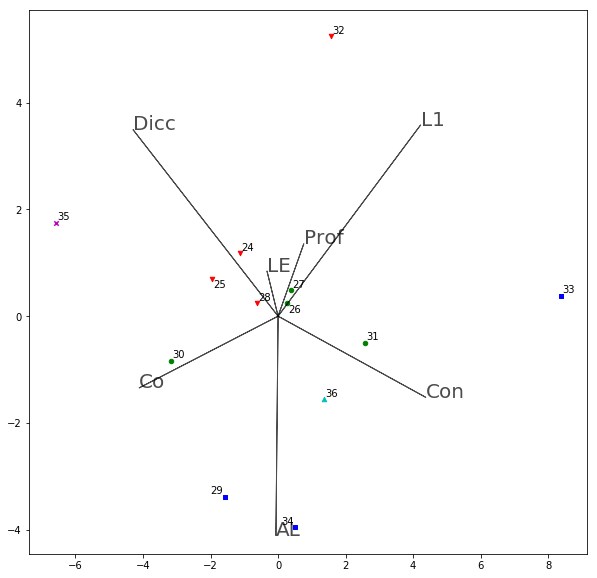

In [80]:
graf_cplot(CTB1.iloc[:-1,:-1], 7, 5, 1, 2)

#### Kreuztabelle Wörter - verwendete Strategien (B1+)

In [81]:
Pal_Es_B1 = pd.crosstab(B1.Palabra, B1.Estrategia_1, margins = True)
Pal_Es_B1_2 = pd.crosstab(B1.Palabra, B1.Estrategia_2, margins = True)

In [82]:
for val in Pal_Es_B1_2.index:
    for col in Pal_Es_B1_2.columns:
        if Pal_Es_B1_2.loc[val,col]!=0:
            Pal_Es_B1.loc[val,col] = Pal_Es_B1.loc[val,col]+ Pal_Es_B1_2.loc[val,col]

In [88]:
Pal_Es_B1.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,46,3,14,74,2,9,2,150
herrscht,4,0,1,8,0,0,0,13
durchschnittlich,2,1,2,8,0,0,0,13
Ehescheidungen,5,0,1,6,0,0,0,12
Marktanteil,5,0,0,6,0,0,0,11
Handlung,3,0,1,6,0,0,0,10
Erfolgssendungen,6,0,0,3,0,0,1,10
wecken,3,0,1,4,0,0,0,8
Cliffhanger,0,0,2,3,0,3,0,8


#### Korrespondenzanalyse und Biplot Wörter - verwendete Strategien (B1+)

In [84]:
#Biplot_B2W = biplot.Classic(Pal_Es_A2.values[:-1,:-1], 7, method = 1)

In [85]:
#R = Biplot_A2W.RowCoord
#C = Biplot_A2W.ColCoord
#cr = Biplot_A2W.RowCont
#cc = Biplot_A2W.ColCont

#### Cluster

In [86]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#ward = AgglomerativeClustering(n_clusters=5).fit(X)

Eventuell können statt 5 auch nur 4 unterschiedliche Gruppen angenommen werden.

##### Darstellung Biplot + Cluster

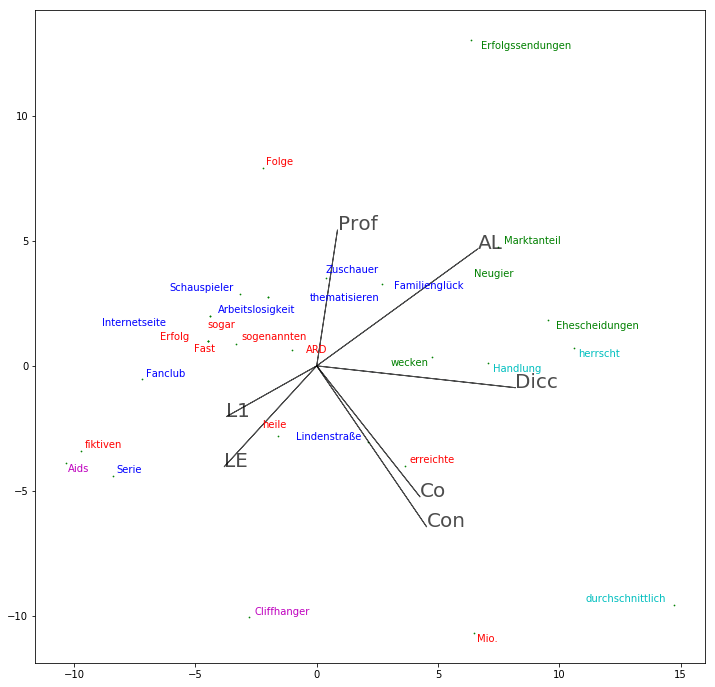

In [87]:
graf_cplot2(Pal_Es_B1.iloc[:-1,:-1],7, 5, sx=12, sy=12)